**Exploratory Data Analysis (EDA) is an important step in the data analysis process. It involves examining and visualizing the data to gain insights and identify patterns or anomalies. In Python, there are several libraries available for performing EDA, such as Pandas, NumPy, Matplotlib, and Seaborn. Here are some common steps to perform EDA in Python:**

**1. Importing the necessary libraries and loading the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/choclate-sales-project/choclate protfolio project - 11.csv')

**2. Understanding the dataset:**

In [3]:
# Checking basic information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   300 non-null    object
 1   Geography      300 non-null    object
 2   Product        300 non-null    object
 3   Amount         300 non-null    object
 4   Units          300 non-null    int64 
 5   cost per unit  300 non-null    int64 
 6   Cost           300 non-null    object
 7   Profit         300 non-null    object
 8   profit %       300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


In [4]:
# Checking the first few rows:
df.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%


**3. Cleaning the data:**

In [5]:
# Checking for missing values:
df.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

**4. Exploring the data:**

In [6]:
#  Descriptive statistics:
df.describe()

,Units,cost per unit
count,300.000000,300.000000
mean,152.200000,9.473333
std,118.099499,3.457717
min,0.000000,3.000000
25%,54.000000,6.000000
50%,124.500000,9.000000
75%,220.500000,12.000000
max,525.000000,17.000000


array([[<AxesSubplot:title={'center':'Units'}>,
        <AxesSubplot:title={'center':'cost per unit'}>]], dtype=object)

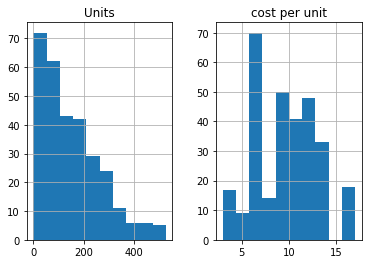

In [7]:
df.hist()

<AxesSubplot:xlabel='Units'>

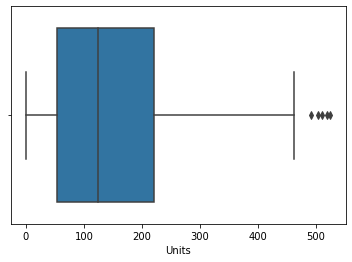

In [8]:
sns.boxplot(x='Units', data=df)


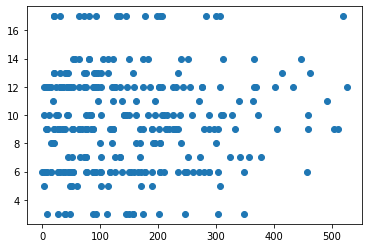

In [9]:
plt.scatter(df['Units'], df['cost per unit'])


**5. Analyzing the relationships between variables:**

In [10]:
# Correlation matrix:
df.corr()

,Units,cost per unit
Units,1.000000,0.057467
cost per unit,0.057467,1.000000


<AxesSubplot:xlabel='Units', ylabel='cost per unit'>

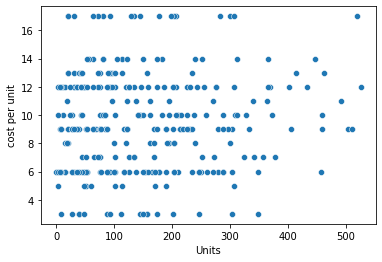

In [11]:
sns.scatterplot(x='Units', y='cost per unit', data=df)


In [12]:
df.tail()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%
299,Husein Augar,Australia,White Choc,"$3,850",102,13,"1,341","$2,509",65%
